# Clustering with K Means

In [42]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [43]:
data=pd.read_csv("income.csv")
data.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


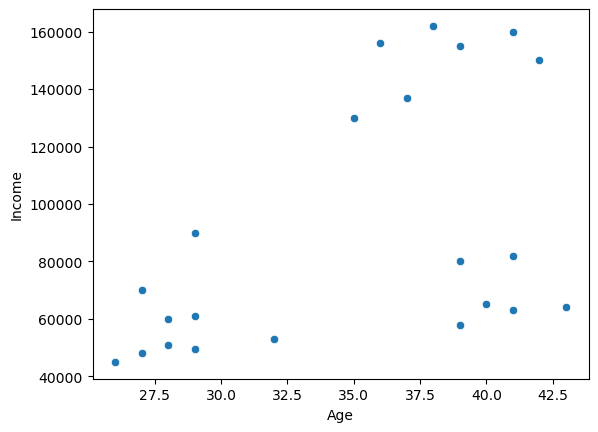

In [44]:
sn.scatterplot(data,x="Age",y="Income")
plt.show()

In [45]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[["Age","Income"]])
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [46]:
data["cluster"]=y_predicted
data.head()

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [47]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

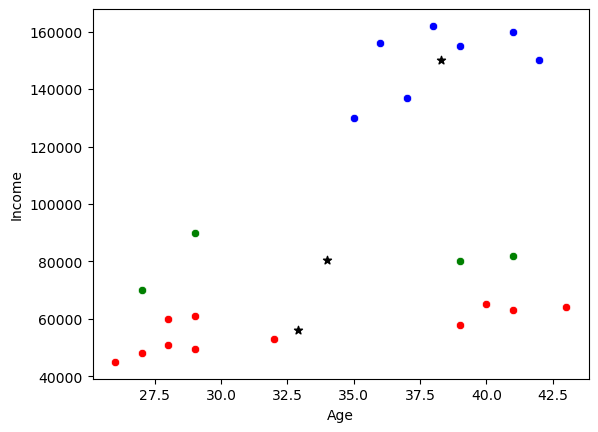

In [48]:
sn.scatterplot(data[data.cluster==1],x="Age",y="Income",color="red")
sn.scatterplot(data[data.cluster==0],x="Age",y="Income",color="blue")
sn.scatterplot(data[data.cluster==2],x="Age",y="Income",color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*")
plt.show()

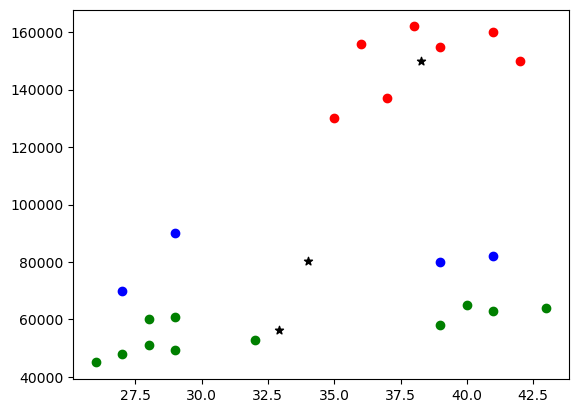

In [49]:
plt.scatter(data[data.cluster==0].Age,data[data.cluster==0].Income,color="red")
plt.scatter(data[data.cluster==1].Age,data[data.cluster==1].Income,color="green")
plt.scatter(data[data.cluster==2].Age,data[data.cluster==2].Income,color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*")


# Preprocessing using MinMaxScaler

In [56]:
scaler=MinMaxScaler()
scaler.fit(data[["Income"]])
data["Income"]=scaler.transform(data[["Income"]])

scaler.fit(data[["Age"]])
data["Age"]=scaler.transform(data[["Age"]])

data.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


<Axes: xlabel='Age', ylabel='Income'>

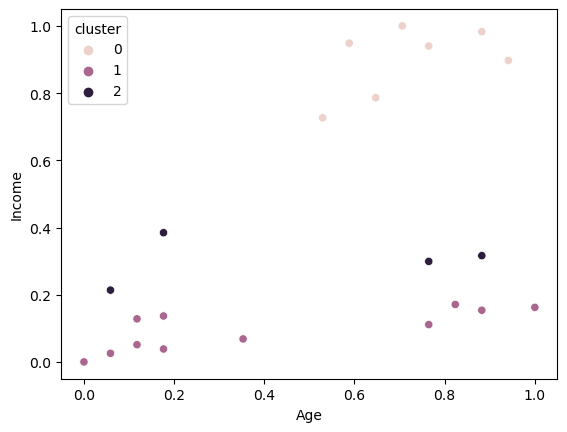

In [59]:
sn.scatterplot(data,x=data.Age,y=data.Income,hue="cluster")

# Elbow Plot

In [62]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(data[["Age","Income"]])
    sse.append(km.inertia_)
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

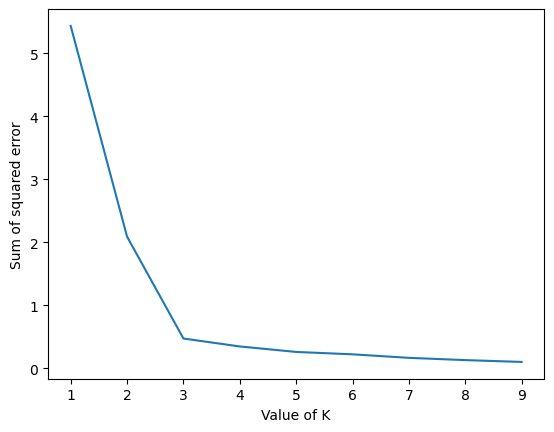

In [64]:
plt.xlabel("Value of K")
plt.ylabel("Sum of squared error")
plt.plot(k_range,sse)

In [65]:
km=KMeans(n_clusters=3)
y_prediction=km.fit_predict(data[["Age","Income"]])


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
data["cluster"]=y_prediction
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


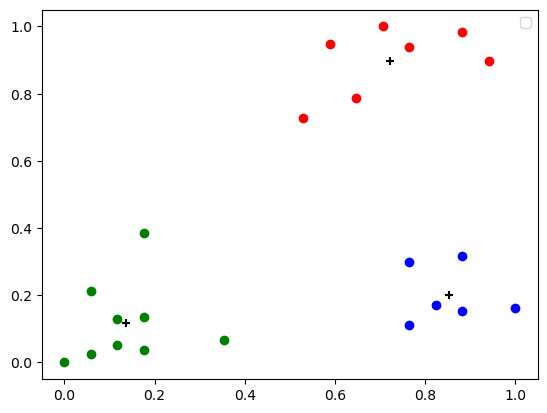

In [73]:
plt.scatter(data[data.cluster==1].Age,data[data.cluster==1].Income,color="red")
plt.scatter(data[data.cluster==0].Age,data[data.cluster==0].Income,color="Blue")
plt.scatter(data[data.cluster==2].Age,data[data.cluster==2].Income,color="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="+")
plt.legend()


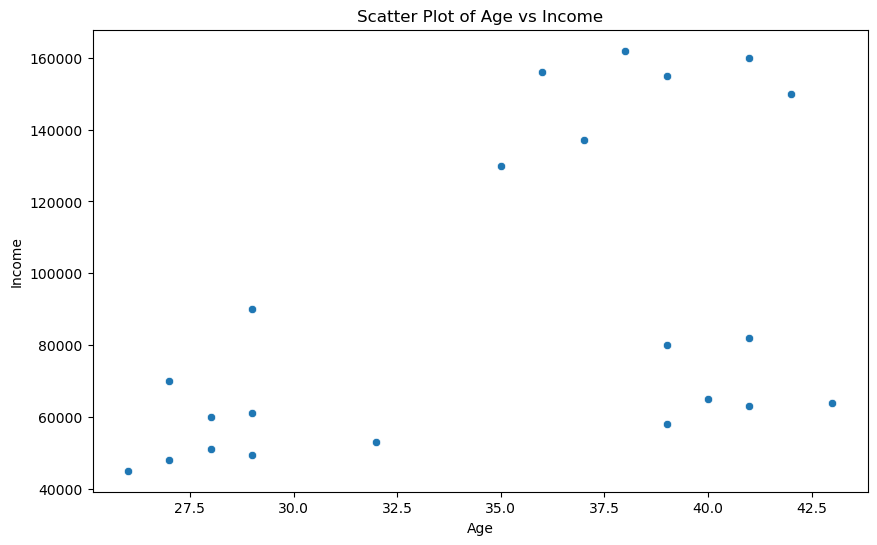

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


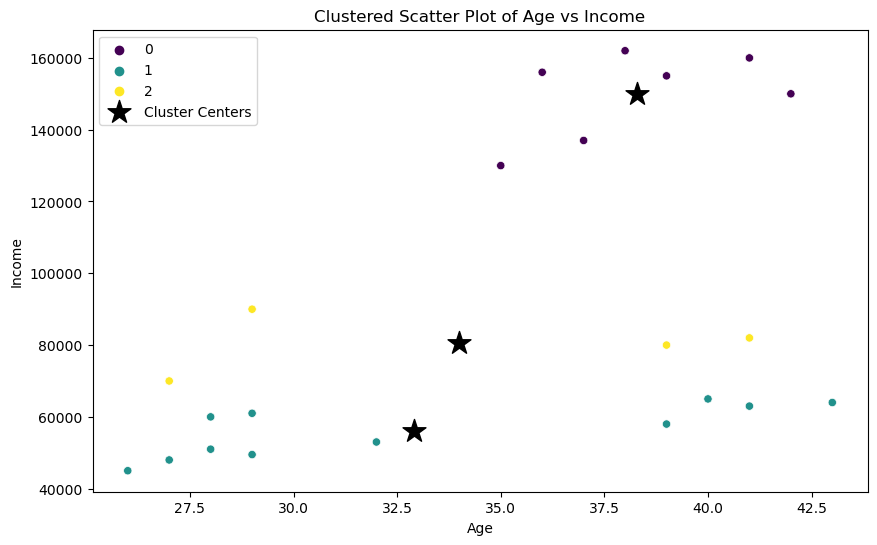

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

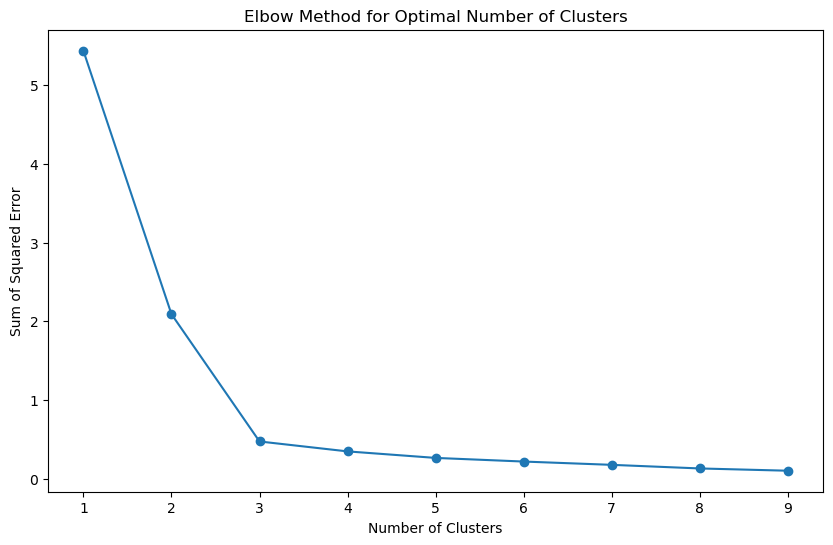

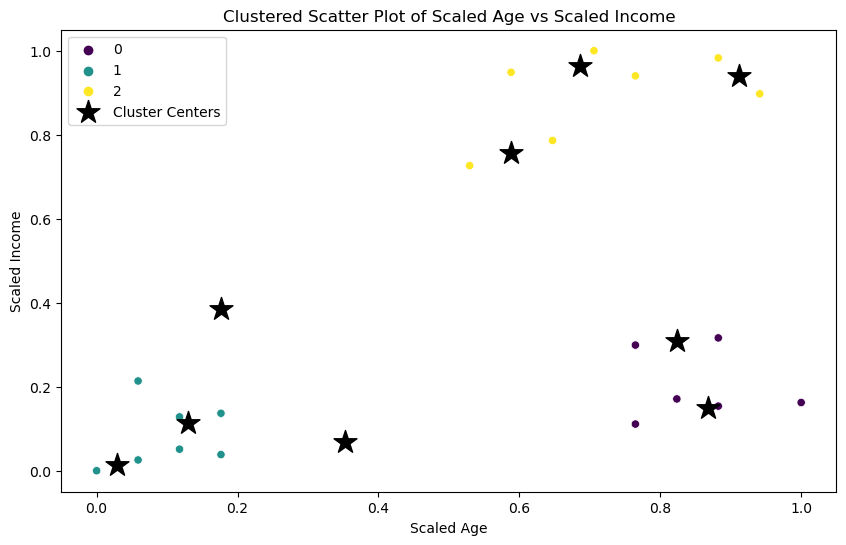

In [74]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("income.csv")

# Visualize the initial scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Income")
plt.title("Scatter Plot of Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

# Perform clustering
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[["Age", "Income"]])
data["cluster"] = y_predicted

# Visualize the clustered scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Income", hue="cluster", palette="viridis")
plt.title("Clustered Scatter Plot of Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="black", marker="*", s=300, label="Cluster Centers")
plt.legend()
plt.show()

# Scale the data
scaler = MinMaxScaler()
data[["Age", "Income"]] = scaler.fit_transform(data[["Age", "Income"]])

# Perform clustering on scaled data
km = KMeans(n_clusters=3)
y_prediction = km.fit_predict(data[["Age", "Income"]])
data["cluster"] = y_prediction

# Elbow Method for determining the optimal number of clusters
sse = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(data[["Age", "Income"]])
    sse.append(km.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker="o")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

# Visualize the final clustered scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Age", y="Income", hue="cluster", palette="viridis")
plt.title("Clustered Scatter Plot of Scaled Age vs Scaled Income")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="black", marker="*", s=300, label="Cluster Centers")
plt.legend()
plt.show()
